<a href="https://colab.research.google.com/github/milena1111-bit/OptimizacijaIzdvajanjaKarakteristikaPomo-uAlgoritmaSlepogMi-a/blob/main/optimizacija_izdvajanja_karakteristika_pomo_u_algoritma_slepog_mi_a_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/heart.csv')

# Sortiraj DataFrame u rastućem redosledu na osnovu više kolona.

data = data.sort_values(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


In [ ]:
#Lista kolona koje treba konvertovati u kategorijalne promenljive.

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Konvertuj navedene kolone u kategorijalne promenljive.

data[categorical_cols] = data[categorical_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 60 to 387
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   category
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   category
 12  thal      1025 non-null   category
 13  target    1025 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 58.4 KB


In [ ]:
#  Više detalja o podatcima

data.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [ ]:
#  Jedinstvene vrednosti za kategorijalnu kolonu

print("Jedinstvena vrednost u kategorijalnoj koloni.:")
for column in data.select_dtypes(include='category'):
    unique_values = np.sort(data[column].astype('object').unique())
    print(f"{column.ljust(7)} = {unique_values}")

Jedinstvena vrednost u kategorijalnoj koloni.:
sex     = [0 1]
cp      = [0 1 2 3]
fbs     = [0 1]
restecg = [0 1 2]
exang   = [0 1]
slope   = [0 1 2]
ca      = [0 1 2 3 4]
thal    = [0 1 2 3]
target  = [0 1]


Proces čišćenja podataka.


In [ ]:
# Prebroj broj nedostajućih vrednosti

num_missing = data.isnull().sum().sum()
print("Broj redova sa nedostajućim vrednostima:", num_missing)

Broj redova sa nedostajućim vrednostima: 0


In [ ]:
# Prebroj broj dupliranih vrednosti.

duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
print("Broj redova sa dupliranim vrednostima:", num_duplicates)

Broj redova sa dupliranim vrednostima: 723


In [ ]:
# Obriši duplirane redove.

data = data.drop_duplicates()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
256,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
254,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0


In [ ]:
def visualize_distribution(dataframe, column):
    plt.figure(figsize=(4, 3))

    # Distribution visualization
    if data[column].dtype == 'category':
        counts = data[column].value_counts().sort_index()
        labels = counts.index.astype(str)
        sizes = counts.values
        colors = sns.color_palette('Oranges', len(labels))
        patches, texts, autotexts = plt.pie(sizes, colors=colors, startangle=90,
                                            wedgeprops={'linewidth': 0.35, 'edgecolor': 'black'},
                                            autopct='%1.1f%%')

        # Customizing labels
        plt.gca().set_aspect('equal')
        plt.title(f'Distribution of {column}', fontsize=10)
        plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.15, 1), frameon=True,
                   labelspacing=0.5, fontsize=6, title=None,
                   handletextpad=1, handlelength=0.8)

        # Add percentages to legend
        total = sum(sizes)
        percentages = [f'{(100 * size / total):.1f}%' for size in sizes]
        for i, text in enumerate(plt.gca().get_legend().get_texts()):
            text.set_text(f'{labels[i]} ({percentages[i]})')

        # Add percentages inside the pie chart (only for >= 10%)
        for autotext, size in zip(autotexts, sizes):
            if size / sum(sizes) >= 0.1:
                autotext.set_color('black')
                autotext.set_fontsize(8)
            else:
                autotext.set_text('')

    else:
        plt.grid(True, linestyle='dotted', linewidth=0.5, alpha=1, zorder=0)
        sns.histplot(data[column], bins=25, color='orange', edgecolor='black')

        # Add dashed lines for outlier boundaries
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        if lower_bound >= 0:
            plt.axvline(lower_bound, color='purple', linestyle='dashed', linewidth=0.75, label='Lower Bound')
        plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=0.75, label='Upper Bound')

        plt.xlabel(column.capitalize(), fontsize=8)
        plt.ylabel('Count', fontsize=8)
        plt.title(f'Distribution of {column}', fontsize=10)
        plt.legend(fontsize=6)

    plt.tight_layout()
    plt.show()

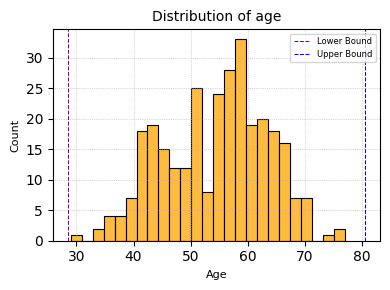

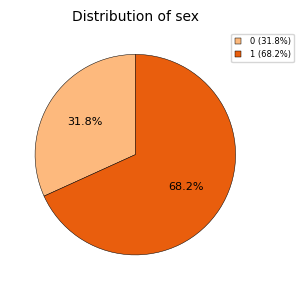

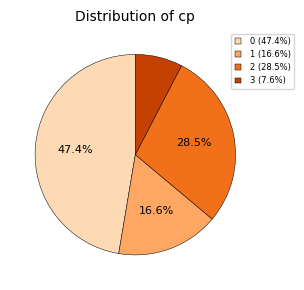

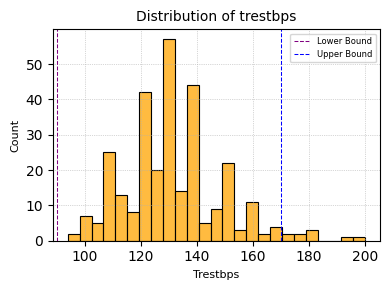

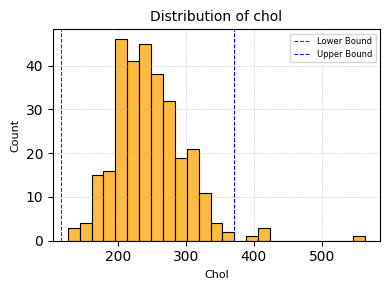

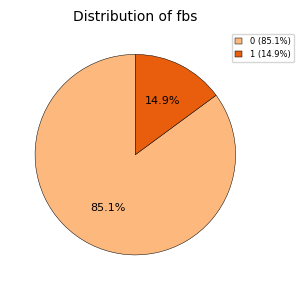

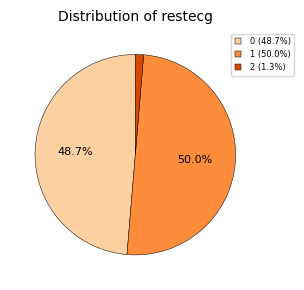

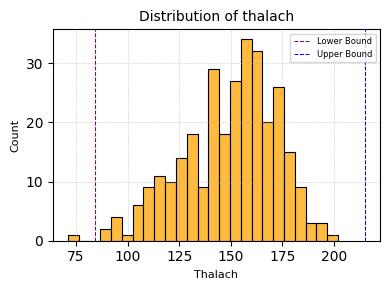

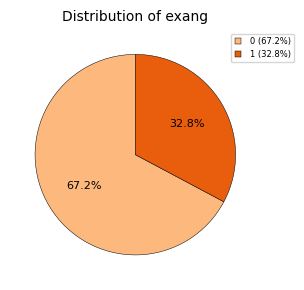

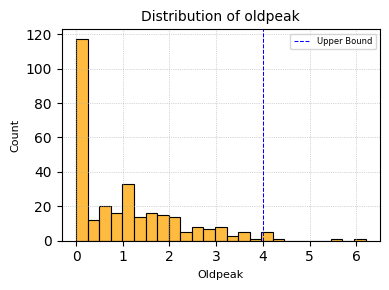

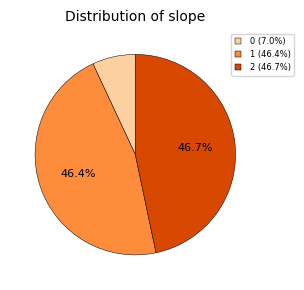

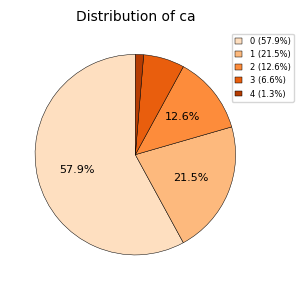

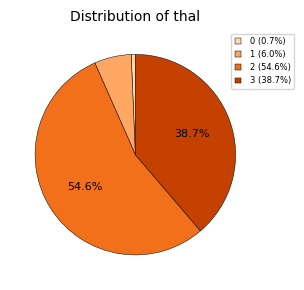

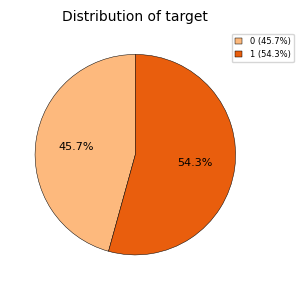

In [ ]:
# Get the column names of the DataFrame
columns = data.columns

# Iterate over each column and visualize the distribution
for column in columns:
    visualize_distribution(data, column)
    print()

In [ ]:
#Binary Bat Algorithm

In [ ]:
def binary_bat_algorithm(population_size, loudness, pulse_rate, max_iterations, dataframe):
    """
    Binary Bat Algorithm (BBA)/Binarni Algoritam Slepog Miša implementacija.

    Paranetri:
    - population_size: broj indivdua koje se nalaze u populaciji
    - loudness: Glasnoća slepih miševa
    - pulse_rate: Brzina pulsa slepih miševa

    - max_iterations: Maksimalan broj iteracija

    - dataframe: DataFrame koji sadrži karakteristike (features) i ciljnu promenljivu (target).


    Returns:
    **Vraća:**

* **best\_solution**: Najbolje pronađeno rešenje
* **best\_fitness**: Najbolja vrednost fitnes funkcije
* **convergence\_curve**: Niz najboljih vrednosti fitnes funkcije po iteracijama
* **accuracy\_curve**: Niz najboljih vrednosti tačnosti po iteracijama
* **con\_matrix**: Matriks konfuzije za najbolje rešenje
* **classification\_report**: Izveštaj klasifikacije za najbolje rešenje

    - best_solution: Best solution found
    - best_fitness: Best fitness value
    - convergence_curve: Array of best fitness values at each iteration
    - accuracy_curve: Array of best accuracy values at each iteration
    - con_matrix : Confusion matrix of the best solution
    - classification_report: Classification report of the best solution
    """
    # Opseg frekvencije

    min_frequency = 0  # Minimalna frekvencija

    max_frequency = 2  # Maksimalna frekvencija.


    # Extract features and target from the dataframe
    features = dataframe.drop(columns=['target'])
    target = dataframe['target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize arrays
    dimension = len(features.columns)
    frequency = np.zeros(population_size)  # Frequency
    velocity = np.zeros((population_size, dimension))  # Velocities
    solutions = np.zeros((population_size, dimension), dtype=int)
    convergence_curve = np.zeros(max_iterations)
    accuracy_curve = np.zeros(max_iterations)

    # Initialize the population/solutions
    for i in range(population_size):
        solutions[i] = np.random.randint(0, 2, dimension)

    fitness = np.zeros(population_size)
    for i in range(population_size):
        selected_features = features.columns[solutions[i].astype(bool)]
        clf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=3)
        clf.fit(X_train[selected_features], y_train)
        y_pred = clf.predict(X_test[selected_features])
        fitness[i] = accuracy_score(y_test, y_pred)

    # Find the current best
    best_fitness = np.max(fitness)  # Find the best fitness value (maximum)
    best_index = np.argmax(fitness)  # Find the index of the best fitness value
    best_solution = solutions[best_index].copy()  # Copy the best solution

    # Start the iterations - Binary Bat Algorithm
    current_iteration = 0
    while current_iteration < max_iterations:
        current_iteration += 1
        convergence_curve[current_iteration - 1] = best_fitness
        accuracy_curve[current_iteration - 1] = best_fitness
        for i in range(population_size):
            for j in range(dimension):
                frequency[i] = min_frequency + (min_frequency - max_frequency) * np.random.rand()
                velocity[i, j] = velocity[i, j] + (solutions[i, j] - best_solution[j]) * np.random.rand()
                v_shaped_transfer_function = np.abs((2 / np.pi) * np.arctan((np.pi / 2) * velocity[i, j]))
                if np.random.rand() < v_shaped_transfer_function:
                    solutions[i, j] = 1 - solutions[i, j]
                else:
                    solutions[i, j] = solutions[i, j]
                if np.random.rand() > pulse_rate:
                    solutions[i, j] = best_solution[j]
            selected_features = features.columns[solutions[i].astype(bool)]
            clf = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=3)
            clf.fit(X_train[selected_features], y_train)
            y_pred = clf.predict(X_test[selected_features])
            new_fitness = accuracy_score(y_test, y_pred)

            if new_fitness >= fitness[i] and np.random.rand() < loudness:
                solutions[i] = solutions[i]
                fitness[i] = new_fitness

            if new_fitness >= best_fitness:
                best_solution = solutions[i].copy()
                best_fitness = new_fitness

        # Display Output
        print("Iteration:", current_iteration)
        print("Selected Features:", features.columns[best_solution.astype(bool)].tolist())
        print("Best Accuracy:", best_fitness, "\n")

        if current_iteration == max_iterations:
            # Calculate and display confusion matrix
            selected_features = features.columns[best_solution.astype(bool)]
            clf = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=3)
            clf.fit(X_train[selected_features], y_train)
            y_pred = clf.predict(X_test[selected_features])
            con_matrix = confusion_matrix(y_test, y_pred)

            # Calculate and display classification report
            report = classification_report(y_test, y_pred)

    return best_solution, best_fitness, convergence_curve, accuracy_curve, con_matrix, report

In [ ]:
# Set parameter for binary bat algorithm
population_size = 100  # Number of individuals in the population/Broj jedinki u populaciji
loudness = 0.5         # Jačina zvuka slepih miševa
pulse_rate = 0.5       # Brzina pulsa slepih mišev
max_iterations = 25    # Maksimalni broj iteracija

Train Model with Random Forest Classifier

In [ ]:
# Call binary_bat_algorithm function
best_solution, best_fitness, convergence_curve, accuracy_curve, con_matrix, report = binary_bat_algorithm(population_size, loudness, pulse_rate, max_iterations, data)

Iteration: 1
Selected Features: ['cp', 'trestbps', 'restecg', 'ca', 'thal']
Best Accuracy: 0.8688524590163934 

Iteration: 2
Selected Features: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'ca', 'thal']
Best Accuracy: 0.8852459016393442 

Iteration: 3
Selected Features: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'ca', 'thal']
Best Accuracy: 0.8852459016393442 

Iteration: 4
Selected Features: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'ca', 'thal']
Best Accuracy: 0.8852459016393442 

Iteration: 5
Selected Features: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'ca', 'thal']
Best Accuracy: 0.8852459016393442 

Iteration: 6
Selected Features: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'ca', 'thal']
Best Accuracy: 0.8852459016393442 

Iteration: 7
Selected Features: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'ca', 'thal']
Best Accuracy: 0.8852459016393442 

Iteration: 8
Selected Features: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 

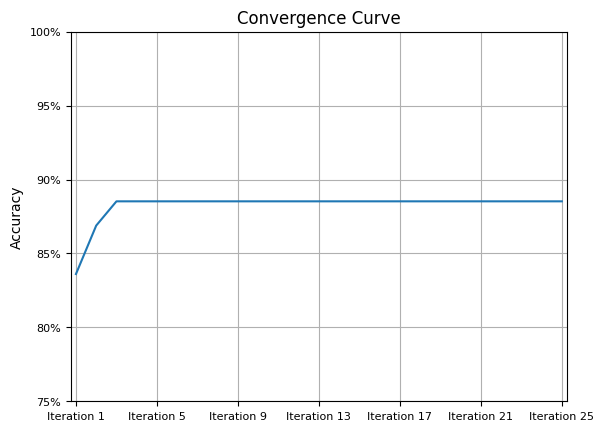

In [ ]:
# Plot convergence curve
plt.plot(range(1, max_iterations + 1), accuracy_curve)
plt.title('Convergence Curve')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1)
plt.xlim(0.75, 25.25)

# Set y-axis tick labels in percentage
yticks = plt.gca().get_yticks()
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in yticks], fontsize=8)

# Set x-axis tick labels and ticks
xticks = range(1, max_iterations + 1, 4)
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(['Iteration {}'.format(x) for x in xticks], fontsize=8)
# Rotate xticks
plt.xticks(rotation=0)

plt.grid(True)
plt.show()

Metrics Evaluation

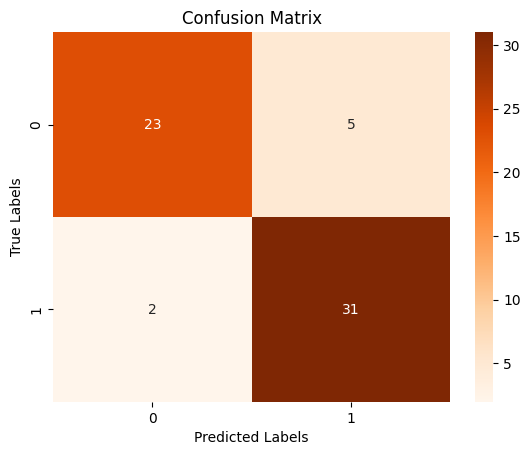

In [ ]:
# Visualize Confusion Matrix
sns.heatmap(con_matrix, annot=True, cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

